# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Set

In [2]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


# Generating Report to get idea on Data Set

In [3]:
import sweetviz as sv
from IPython.display import IFrame
report= sv.analyze(df)
report.show_html("report.html")

#display report in notebook
IFrame(src="report.html",width=1000,height=600)

                                             |                                             | [  0%]   00:00 ->…

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# EDA

## Target Variable Distribution

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


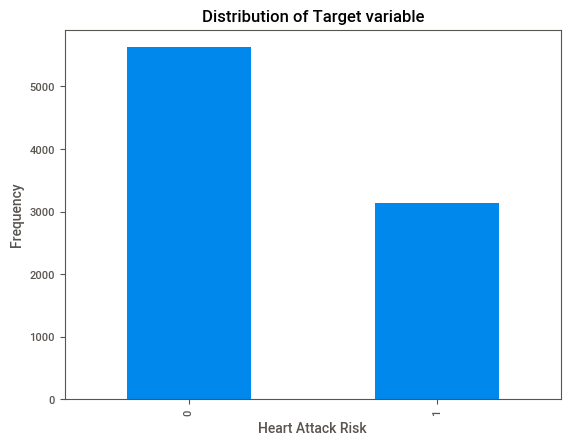

In [4]:
class_counts = df['Heart Attack Risk'].value_counts()
print(class_counts)
class_counts.plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of Target variable')
plt.show()

In [5]:
# Get the list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']


## Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

# Get the list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each categorical column and transform it
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Print the modified DataFrame
print(df)

      Patient ID  Age  Sex  Cholesterol  Blood Pressure  Heart Rate  Diabetes  \
0            521   67    1          208            2510          72         0   
1            998   21    1          389            2815          98         1   
2            529   21    0          324            3224          72         1   
3           3160   84    1          383            2689          73         1   
4           2083   66    1          318            3563          93         1   
...          ...  ...  ...          ...             ...         ...       ...   
8758        4228   60    1          121            3680          61         1   
8759        5502   28    0          120            2434          73         1   
8760        7837   47    1          250            2624         105         0   
8761        1552   36    1          178             838          60         1   
8762        8719   25    0          356            1637          75         1   

      Family History  Smoki

## Smote OverSampling

In [7]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Get the list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Separate features and target
X = df_encoded.drop(columns=['Heart Attack Risk'])  # Features
y = df_encoded['Heart Attack Risk']  # Target variable

# Initialize SMOTE
smote = SMOTE()

# Perform SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Heart Attack Risk'])], axis=1)

# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(df_resampled['Heart Attack Risk'].value_counts())


Class distribution after oversampling:
Heart Attack Risk
0    5624
1    5624
Name: count, dtype: int64


## Data Preprocessing

In [8]:
df.shape

(8763, 26)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   int32  
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   int32  
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   int32  
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [10]:
#Finding Null Values
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,53.707977,0.697364,259.877211,1945.335502,75.021682,0.652288,0.492982,0.896839,0.501426,...,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,9.382175,2.428849,0.354102,0.358211
std,2529.804538,21.249509,0.459425,80.863276,1130.449450,20.550948,0.476271,0.499979,0.304186,0.500026,...,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,5.788964,1.597561,0.478268,0.479502
min,0.000000,18.000000,0.000000,120.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,2190.500000,35.000000,0.000000,192.000000,967.500000,57.000000,0.000000,0.000000,1.000000,0.000000,...,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,4.000000,1.000000,0.000000,0.000000
50%,4381.000000,54.000000,1.000000,259.000000,1940.000000,75.000000,1.000000,0.000000,1.000000,1.000000,...,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,9.000000,3.000000,0.000000,0.000000
75%,6571.500000,72.000000,1.000000,330.000000,2917.500000,93.000000,1.000000,1.000000,1.000000,1.000000,...,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,14.000000,4.000000,1.000000,1.000000
max,8762.000000,90.000000,1.000000,400.000000,3914.000000,110.000000,1.000000,1.000000,1.000000,1.000000,...,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,19.000000,5.000000,1.000000,1.000000


In [13]:
import pandas as pd
X = df.drop("Heart Attack Risk", axis=1)  # Drop the target column to create features
y = df[["Heart Attack Risk"]]  # Select only the target column

# Display the target column
print(y["Heart Attack Risk"])

# Select numerical columns for further processing
df_num = df.select_dtypes(include=['int64', 'float'])
print("Numerical columns:", df_num.columns)

0       0
1       0
2       0
3       0
4       0
       ..
8758    0
8759    0
8760    1
8761    0
8762    1
Name: Heart Attack Risk, Length: 8763, dtype: int64
Numerical columns: Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk'],
      dtype='object')


## Data Visualization

array([[<Axes: title={'center': 'Patient ID'}>,
        <Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Blood Pressure'}>],
       [<Axes: title={'center': 'Heart Rate'}>,
        <Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Family History'}>,
        <Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'Obesity'}>],
       [<Axes: title={'center': 'Alcohol Consumption'}>,
        <Axes: title={'center': 'Exercise Hours Per Week'}>,
        <Axes: title={'center': 'Diet'}>,
        <Axes: title={'center': 'Previous Heart Problems'}>,
        <Axes: title={'center': 'Medication Use'}>],
       [<Axes: title={'center': 'Stress Level'}>,
        <Axes: title={'center': 'Sedentary Hours Per Day'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Triglycerides'}>],
       [<Axes: ti

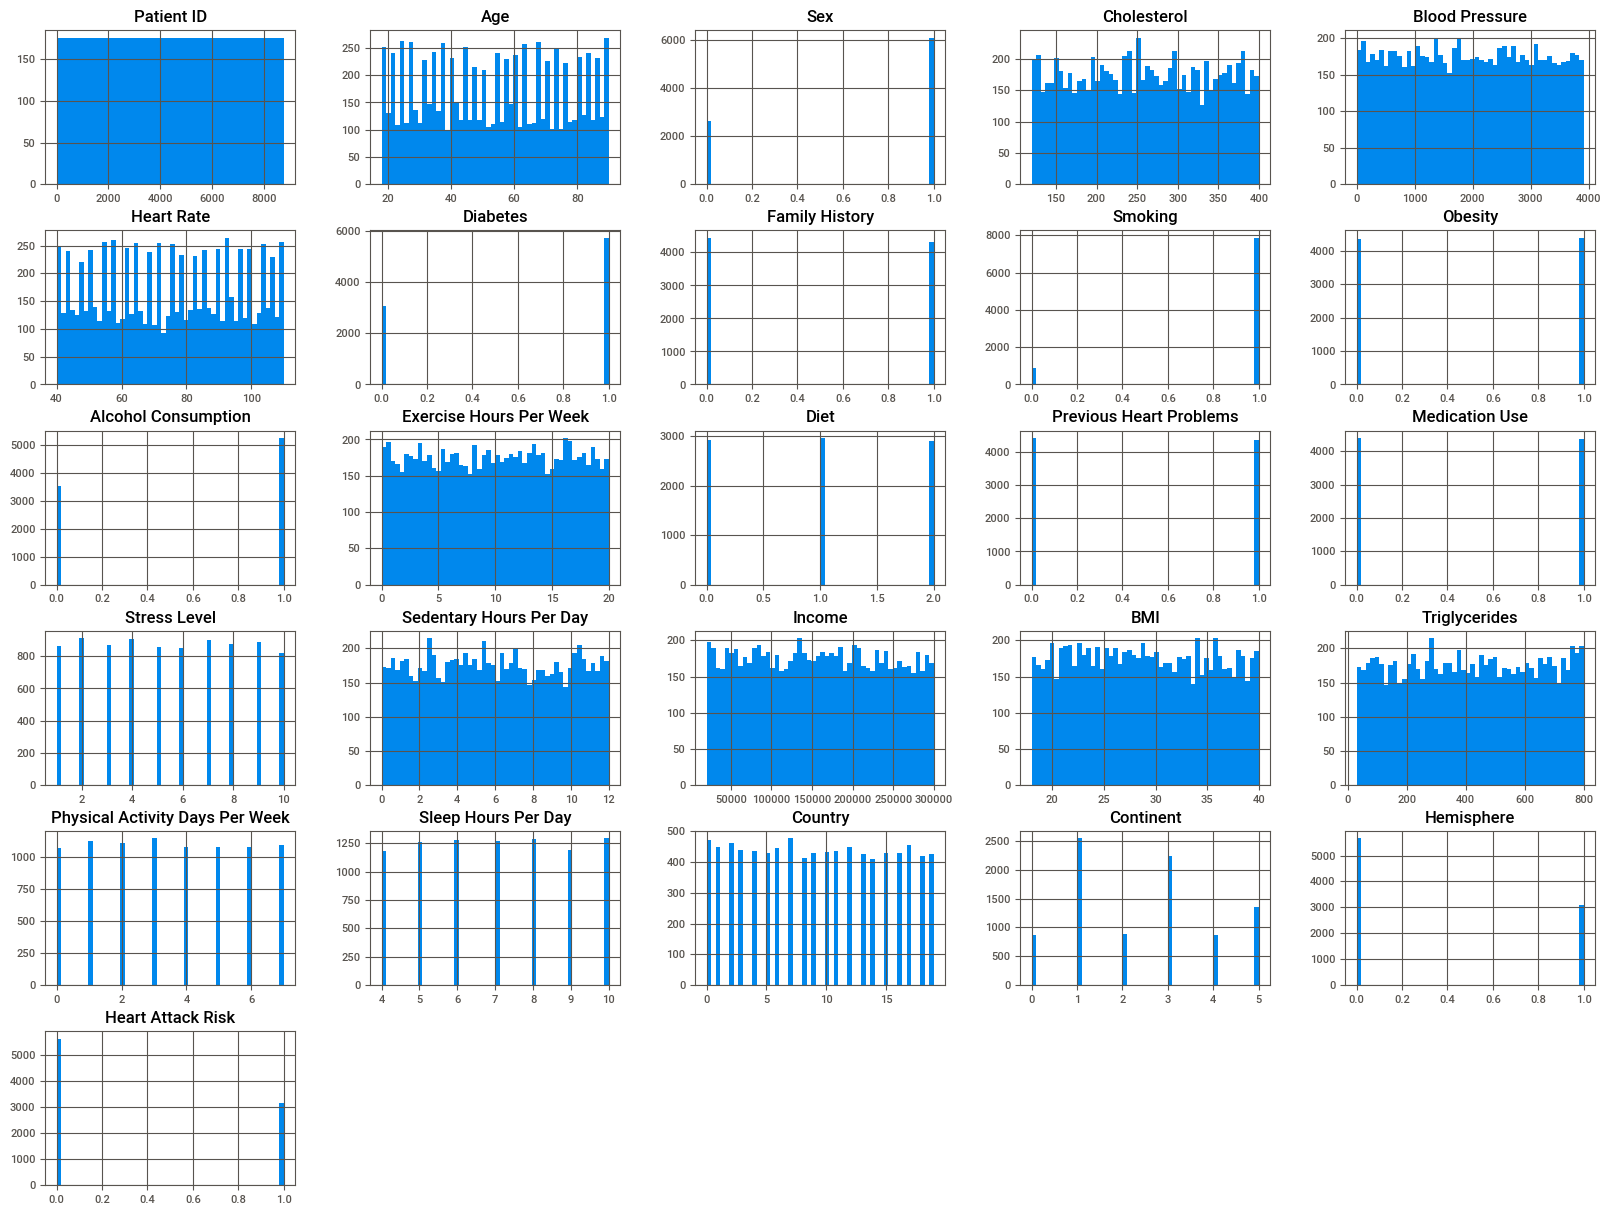

In [14]:
df.hist(bins=50, figsize=(20,15))

## Feature Scaling using min-max scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the numerical data and transform it
X_scaled = scaler.fit_transform(df_num)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=df_num.columns)

# Display the scaled DataFrame
print(df_scaled.head())

        Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0  0.680556     0.314286    0.457143       0.0             0.0      1.0   
1  0.041667     0.960714    0.828571       1.0             1.0      1.0   
2  0.041667     0.728571    0.457143       1.0             0.0      0.0   
3  0.916667     0.939286    0.471429       1.0             1.0      1.0   
4  0.666667     0.707143    0.757143       1.0             1.0      1.0   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  \
0      0.0                  0.0                 0.208326   
1      1.0                  1.0                 0.090557   
2      0.0                  0.0                 0.103815   
3      0.0                  1.0                 0.491376   
4      1.0                  0.0                 0.290147   

   Previous Heart Problems  Medication Use  Stress Level  \
0                      0.0             0.0      0.888889   
1                      1.0             0.0      0.000000   
2       

## Standardization

In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numerical data and transform it
X_normalized = scaler.fit_transform(df_num)

# Convert the normalized data back to a DataFrame
df_normalized = pd.DataFrame(X_normalized, columns=df_num.columns)

# Display the normalized DataFrame
print(df_normalized.head())

        Age  Cholesterol  Heart Rate  Diabetes  Family History   Smoking  \
0  0.625557    -0.641579   -0.147042 -1.369651       -0.986061  0.339157   
1 -1.539322     1.596895    1.118179  0.730113        1.014136  0.339157   
2 -1.539322     0.793023   -0.147042  0.730113       -0.986061 -2.948488   
3  1.425621     1.522691   -0.098380  0.730113        1.014136  0.339157   
4  0.578495     0.718820    0.874867  0.730113        1.014136  0.339157   

    Obesity  Alcohol Consumption  Exercise Hours Per Week  \
0 -1.002857            -1.219867                -1.010838   
1  0.997151             0.819762                -1.418027   
2 -1.002857            -1.219867                -1.372188   
3 -1.002857             0.819762                -0.032188   
4  0.997151            -1.219867                -0.727941   

   Previous Heart Problems  Medication Use  Stress Level  \
0                -0.991704       -0.996696      1.234604   
1                 1.008365       -0.996696     -1.563129

## Correlation

<Axes: >

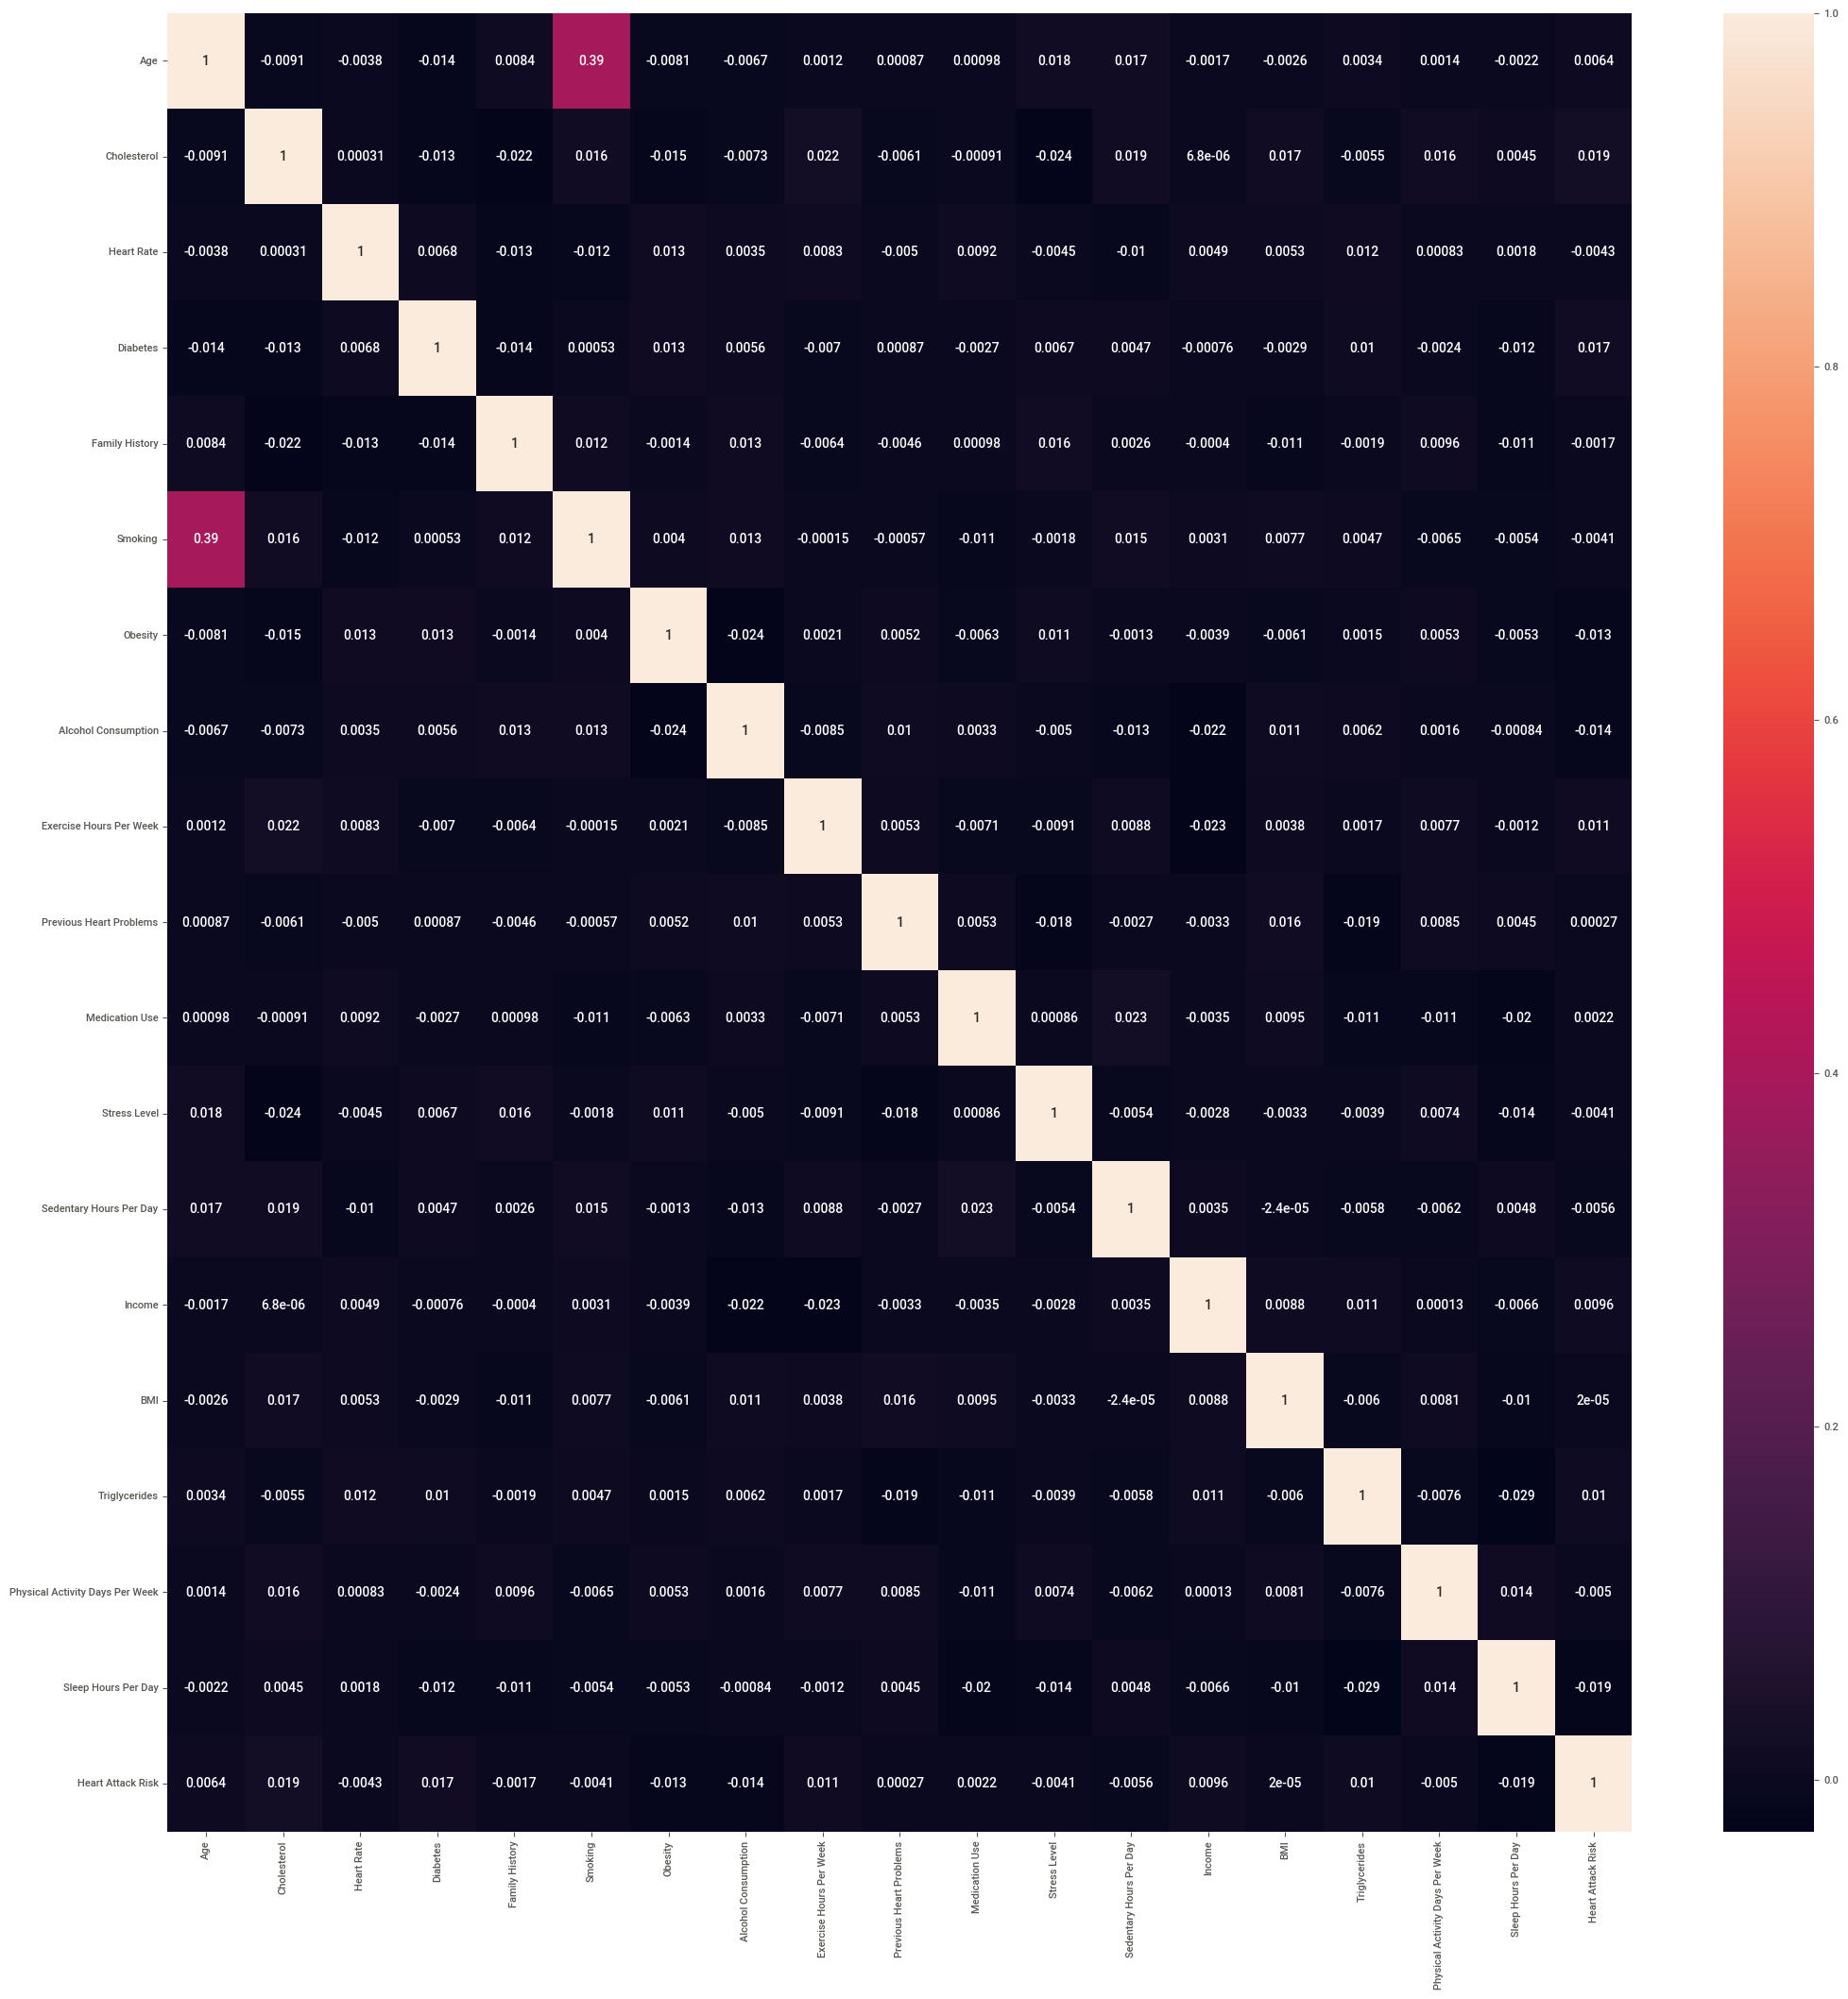

In [17]:
plt.figure(figsize=(25,25))
sns.heatmap(df_num.corr(),annot = True)

In [18]:
# Correlation Summary
correlation_summary = df_num.corr().describe()
print(correlation_summary)

             Age  Cholesterol  Heart Rate   Diabetes  Family History  \
count  19.000000    19.000000   19.000000  19.000000       19.000000   
mean    0.073931     0.053215    0.053274   0.052428        0.051241   
std     0.241899     0.229723    0.229392   0.229648        0.229975   
min    -0.014105    -0.024487   -0.013470  -0.014105       -0.021608   
25%    -0.003228    -0.008184   -0.004399  -0.004933       -0.008788   
50%     0.000980     0.000007    0.001811   0.000527       -0.001444   
75%     0.007378     0.016817    0.007520   0.006741        0.008957   
max     1.000000     1.000000    1.000000   1.000000        1.000000   

         Smoking    Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  19.000000  19.000000            19.000000                19.000000   
mean    0.075228   0.051025             0.050790                 0.053080   
std     0.241487   0.230003             0.230128                 0.229511   
min    -0.012331  -0.024195            -0.0

In [19]:
# Normalisation here
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7010, 25)
(7010, 1)
(1753, 25)
(1753, 1)


In [21]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (7010, 25)
y_train shape: (7010, 1)


# Modeling

In [22]:
# Define the classifiers with specific parameters
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define classifiers
DT = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=4)
RF = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
KNN = KNeighborsClassifier(n_neighbors=10)
SVM = SVC(kernel='rbf', C=2)
GB = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=3, random_state=0)
X_GB = XGBClassifier(learning_rate=0.01, n_estimators=10, max_depth=10, gamma=0.6, subsample=0.52,
                     colsample_bytree=0.6, seed=4, reg_lambda=2, booster='gbtree',
                     colsample_bylevel=0.6, colsample_bynode=0.5)

# List of classifiers
classifiers = [
    ('Decision Tree', DT),
    ('Random Forest', RF),
    ('K-Nearest Neighbors', KNN),
    ('Support Vector Classifier', SVM),
    ('Gradient Boosting', GB),
    ('XGBoost', X_GB)
]

# Initialize list to store results
results = []

# Ensure y_train is a 1D array
y_train = y_train.values.ravel() if isinstance(y_train, pd.DataFrame) else y_train.ravel()

# Evaluate each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)


                       Model  Accuracy  Precision    Recall  F1 Score
0              Decision Tree  0.641757   0.320878  0.500000  0.390896
1              Random Forest  0.641757   0.320878  0.500000  0.390896
2        K-Nearest Neighbors  0.615516   0.502683  0.501011  0.452279
3  Support Vector Classifier  0.631489   0.523182  0.505014  0.435452
4          Gradient Boosting  0.641757   0.320878  0.500000  0.390896
5                    XGBoost  0.641757   0.320878  0.500000  0.390896


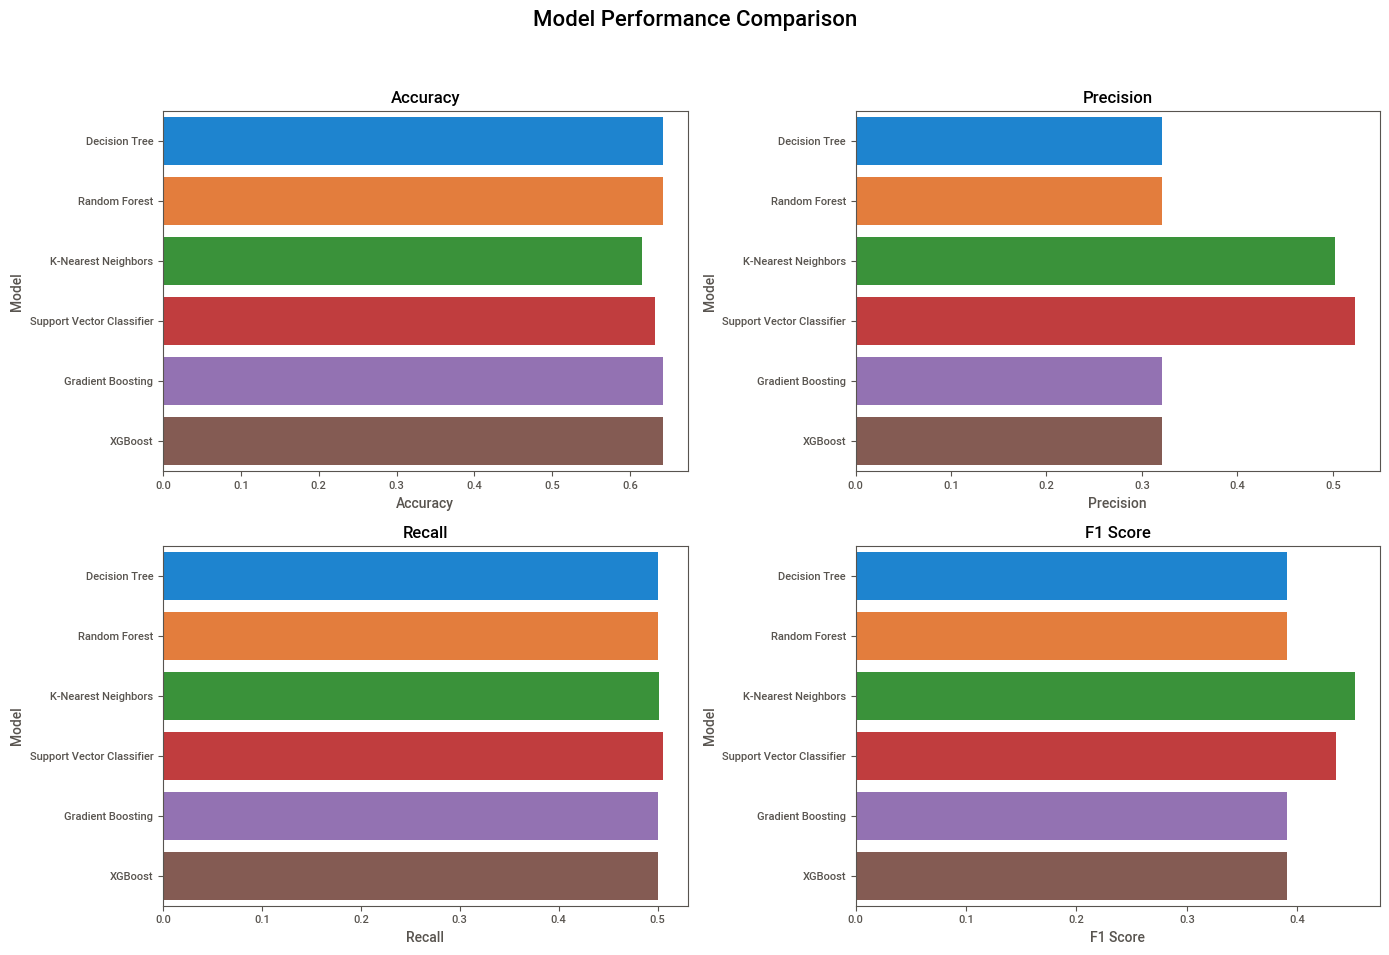

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume results_df is defined and contains model performance data
# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Comparison', fontsize=16)

# Accuracy Plot
sns.barplot(ax=axes[0, 0], data=results_df, x='Accuracy', y='Model')
axes[0, 0].set_title('Accuracy')

# Precision Plot
sns.barplot(ax=axes[0, 1], data=results_df, x='Precision', y='Model')
axes[0, 1].set_title('Precision')

# Recall Plot
sns.barplot(ax=axes[1, 0], data=results_df, x='Recall', y='Model')
axes[1, 0].set_title('Recall')

# F1 Score Plot
sns.barplot(ax=axes[1, 1], data=results_df, x='F1 Score', y='Model')
axes[1, 1].set_title('F1 Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [24]:
y_train.shape

(7010,)

# Model Optimisation

In [25]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Define the Decision Tree classifier with default parameters
DT = DecisionTreeClassifier(random_state=12)

# Define the parameter grid for hyperparameter optimization
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DT, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best parameters to initialize the optimized Decision Tree classifier
optimized_DT = DecisionTreeClassifier(**best_params)

# Fit the optimized model to the training data
optimized_DT.fit(X_train, y_train)

# Predict on the test data
y_pred = optimized_DT.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy and best parameters
print("Optimized Decision Tree Accuracy:", accuracy)
print("Best Parameters:", best_params)

# Classification report with zero_division parameter set to 1
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Cross Validation (optional)
if 'cross_val' in locals() or 'cross_val' in globals():
    scores = cross_val_score(optimized_DT, X_train, y_train, cv=5)
    print("Cross-Validation Accuracy Scores:", scores)
    print("Mean CV Accuracy:", np.mean(scores))


Optimized Decision Tree Accuracy: 0.6417569880205363
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       1.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.82      0.50      0.39      1753
weighted avg       0.77      0.64      0.50      1753

Confusion Matrix:
[[1125    0]
 [ 628    0]]


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the KNN classifier with default parameters
knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter optimization
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric to use
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best parameters to initialize the optimized KNN classifier
optimized_knn = KNeighborsClassifier(**best_params)

# Fit the optimized model to the training data
optimized_knn.fit(X_train, y_train)

# Predict on the test data
y_pred = optimized_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy and best parameters
print("Optimized KNN Accuracy:", accuracy)
print("Best Parameters:", best_params)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Optimized KNN Accuracy: 0.5904164289788933
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1125
           1       0.36      0.18      0.24       628

    accuracy                           0.59      1753
   macro avg       0.50      0.50      0.48      1753
weighted avg       0.54      0.59      0.55      1753

Confusion Matrix:
[[924 201]
 [517 111]]


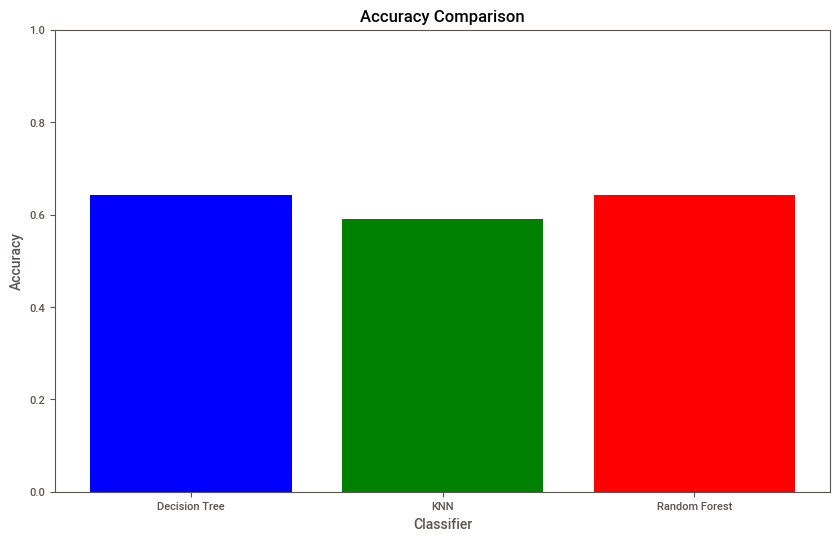

In [30]:
import matplotlib.pyplot as plt

# Accuracy values
accuracy_dt = 0.6417569880205363
accuracy_knn = 0.5904164289788933
accuracy_rf = 0.641757

# Classifier names
classifiers = ['Decision Tree', 'KNN', 'Random Forest']

# Accuracy values
accuracy_values = [accuracy_dt, accuracy_knn, accuracy_rf]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_values, color=['blue', 'green', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limit to range from 0 to 1
plt.show()


Decision Tree Accuracy: 0.5385054192812322
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1125
           1       0.36      0.36      0.36       628

    accuracy                           0.54      1753
   macro avg       0.50      0.50      0.50      1753
weighted avg       0.54      0.54      0.54      1753

Confusion Matrix for Decision Tree:
[[715 410]
 [399 229]]


KNN Accuracy: 0.5624643468339988
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1125
           1       0.34      0.23      0.27       628

    accuracy                           0.56      1753
   macro avg       0.49      0.49      0.48      1753
weighted avg       0.53      0.56      0.54      1753

Confusion Matrix for KNN:
[[841 284]
 [483 145]]


Random Forest Accuracy: 0.6326297775242442
Classification Report for Random Forest:
  

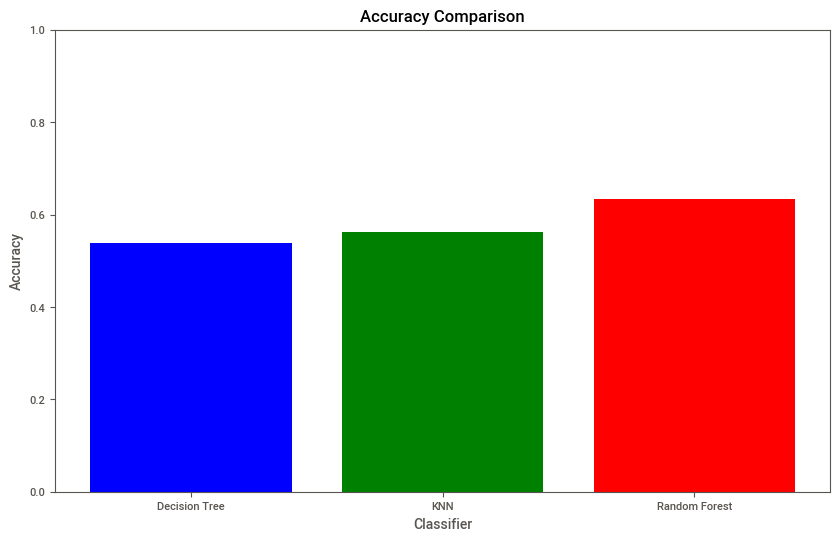

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=12),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=12)
}

# Train and evaluate classifiers
accuracy_values = {}
classification_reports = {}
confusion_matrices = {}

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy_values[clf_name] = accuracy_score(y_test, y_pred)
    classification_reports[clf_name] = classification_report(y_test, y_pred)
    confusion_matrices[clf_name] = confusion_matrix(y_test, y_pred)

# Print accuracy values and evaluation metrics
for clf_name, accuracy in accuracy_values.items():
    print(f"{clf_name} Accuracy:", accuracy)
    print(f"Classification Report for {clf_name}:")
    print(classification_reports[clf_name])
    print(f"Confusion Matrix for {clf_name}:")
    print(confusion_matrices[clf_name])
    print("\n")

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracy_values.keys(), accuracy_values.values(), color=['blue', 'green', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limit to range from 0 to 1
plt.show()


# Result : Random Forest is the best Model